In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardiogoodfitness/CardioGoodFitness.csv


<H1>Cardio Good Fitness Case Study - Descriptive Statistics</H1>


The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months.

The team identifies the following customer variables to study:
1. product purchased, TM195, TM498, or TM798;
2. gender;
3. age, in years;
4. education, in years;
5. relationship status, single or partnered;
6. annual household income ;
7. average number of times the customer plans to use the treadmill each week;
8. average number of miles the customer expects to walk/run each week;
9. and self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns

We start by importing necessary libraries.

In [3]:
df=pd.read_csv('../input/cardiogoodfitness/CardioGoodFitness.csv')
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


Reading the first 5 values of the dataset, for general understanding. This is just to understand that what kind of data is updated in the dataset

In [4]:
df.tail(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


Reading the last 5 values of the dataset, for general understanding. This is just to understand that what kind of data is updated in the dataset

In [5]:
df.loc[np.random.randint(1,179,10)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
93,TM498,23,Male,16,Partnered,3,3,45480,64
32,TM195,25,Female,16,Partnered,2,2,40932,47
172,TM798,34,Male,16,Single,5,5,92131,150
168,TM798,30,Male,18,Partnered,5,4,103336,160
84,TM498,21,Female,14,Partnered,5,4,34110,212
132,TM498,37,Female,16,Partnered,2,3,48891,85
121,TM498,33,Female,16,Partnered,2,3,50028,85
21,TM195,23,Male,16,Single,4,3,40932,94
119,TM498,32,Male,16,Partnered,3,3,53439,95
148,TM798,24,Female,16,Single,5,5,52291,200


Extracting random values to avoid any type baising in the dataset in the first or last columns. Generating random values of indexes helps to check even if there is a null value, in between the dataset, without using info() or isnull() functions. The value of extracting null value in the complete dataset using random indexing is compeltely probability based.

In [6]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

Extracting all the column names. Its just a check weather all the columns are extracted during head() or tail() function. The columns method helps to extract only column name from the dataset. Usually only first line of the dataset, is extracted for naming columns.

<H2>Understanding the Data</H2>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


By the results gained above, we can see the total count data in each column is 180 line items and the data type of each column is defined along side.

In [8]:
df.describe().round(1)

,Age,Education,Usage,Fitness,Income,Miles
count,180.0,180.0,180.0,180.0,180.0,180.0
mean,28.8,15.6,3.5,3.3,53719.6,103.2
std,6.9,1.6,1.1,1.0,16506.7,51.9
min,18.0,12.0,2.0,1.0,29562.0,21.0
25%,24.0,14.0,3.0,3.0,44058.8,66.0
50%,26.0,16.0,3.0,3.0,50596.5,94.0
75%,33.0,16.0,4.0,4.0,58668.0,114.8
max,50.0,21.0,7.0,5.0,104581.0,360.0


Here we can see the basic statistics of the dataset, for columns having numerical datatype. Inferences: 
1. The average age of the person using the cardio fitness equipment is 28.8 years(mean), while the age of an average person is 26 years(median) who is purchasing the cardio equipment.
2. Here we can see approx 90/180 people(surveyed) who are buying the cardio equipments are between the age of 18 years to 26 years,earning from 29.5K to 50.5K.
3. Almost 25% of the people lies in the higher age category i.e. between 33 years to 50 years.
4. On an average 103.2 miles are ran by a person over the treadmill

In [9]:
df.describe(include='O')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,TM195,Male,Partnered
freq,80,104,107


The basic stats for the columns having categorical data is shown.
1. In total 3 unique treadmills are being used for the generation of dataset
2. 104/180 line items are there for the male gender and 107/108 people are married/partnered based on their maritial status.
3. The top most used treadmill is TM195, having in total selection for 80/180 line items i.e. 44.4%.

In [10]:
df.describe(include='all').round(1).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.8,6.9,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.6,1.6,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.5,1.1,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.3,1.0,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.6,16506.7,29562.0,44058.8,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.2,51.9,21.0,66.0,94.0,114.8,360.0


Here we can see all the columns and their basic statistics as discussed above.

In [11]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

The check for null values is done, as depicted no null value is present in either of the column. The same is checked by using info() function, where the non-null values were counted.

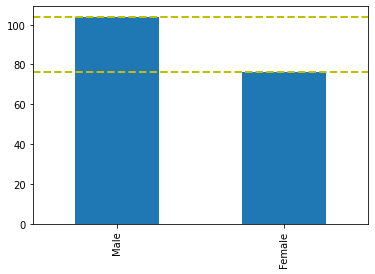

In [12]:
male=df[df['Gender']=='Male']
female=df[df['Gender']=='Female']
df.Gender.value_counts().plot.bar()
plt.axhline(male['Gender'].count(),color='y', linewidth=2, linestyle='--')
plt.axhline(female['Gender'].count(),color='y', linewidth=2, linestyle='--')

As discussed previously, the total no of male subjects for the survey was 104 and females were 76. The same is shown in the chart above.

In [13]:
pd.pivot_table?

<AxesSubplot:xlabel='Age', ylabel='Density'>

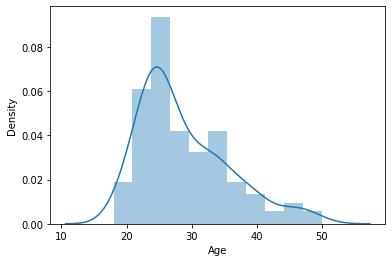

In [14]:
sns.distplot(df['Age'])

The distribution plot, depicts the behaviour of the data. As seen, the data is right skewed based on age. The mean of the age is 28.8 years while the median is 26 years. The value of skewness is approx 0.98(derived below).

In [15]:
df['Age'].skew()

0.9821608255301499

<AxesSubplot:xlabel='Miles', ylabel='Density'>

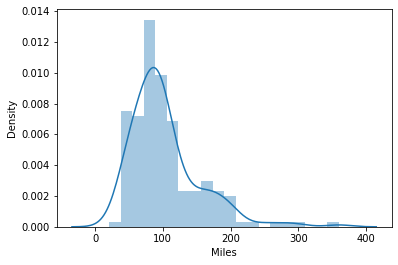

In [16]:
sns.distplot(df['Miles'])

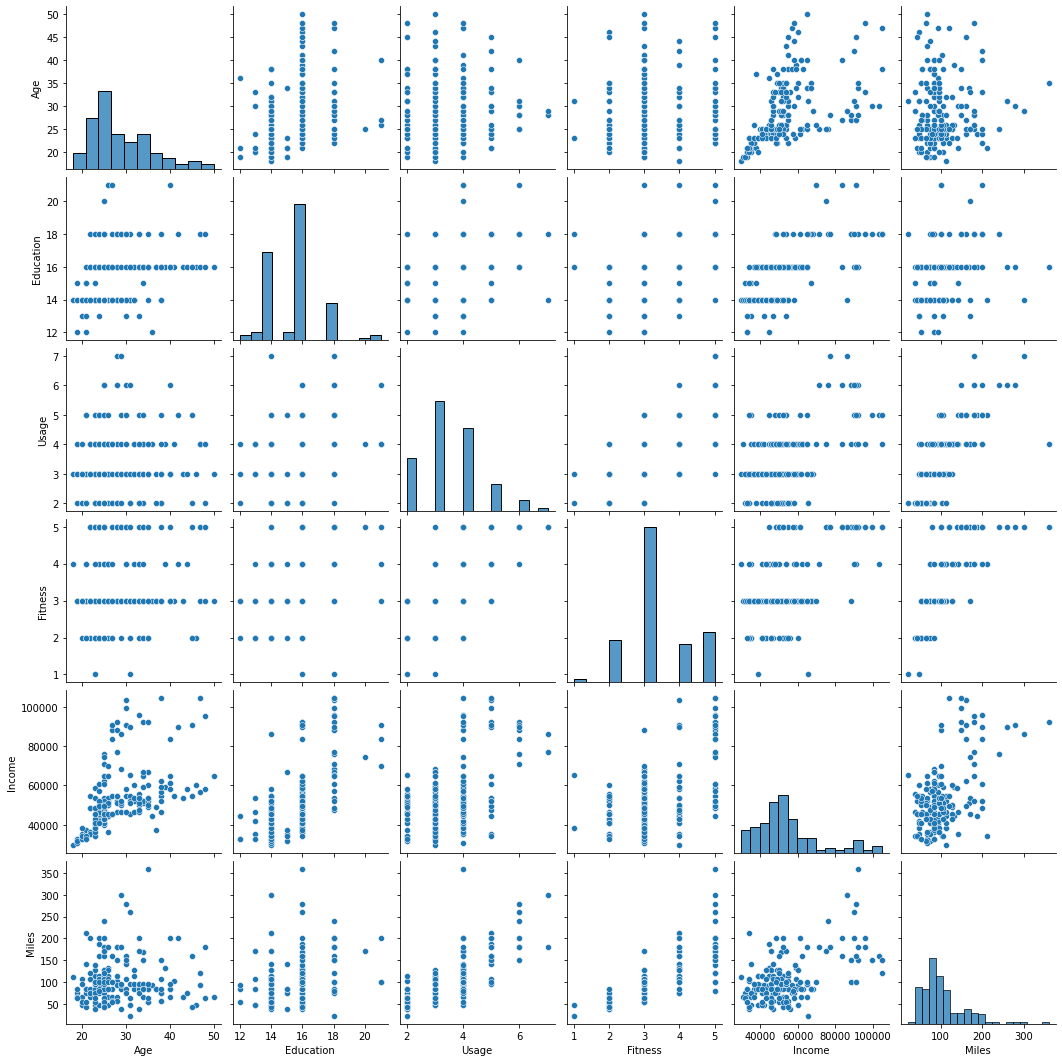

In [17]:
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Fitness'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

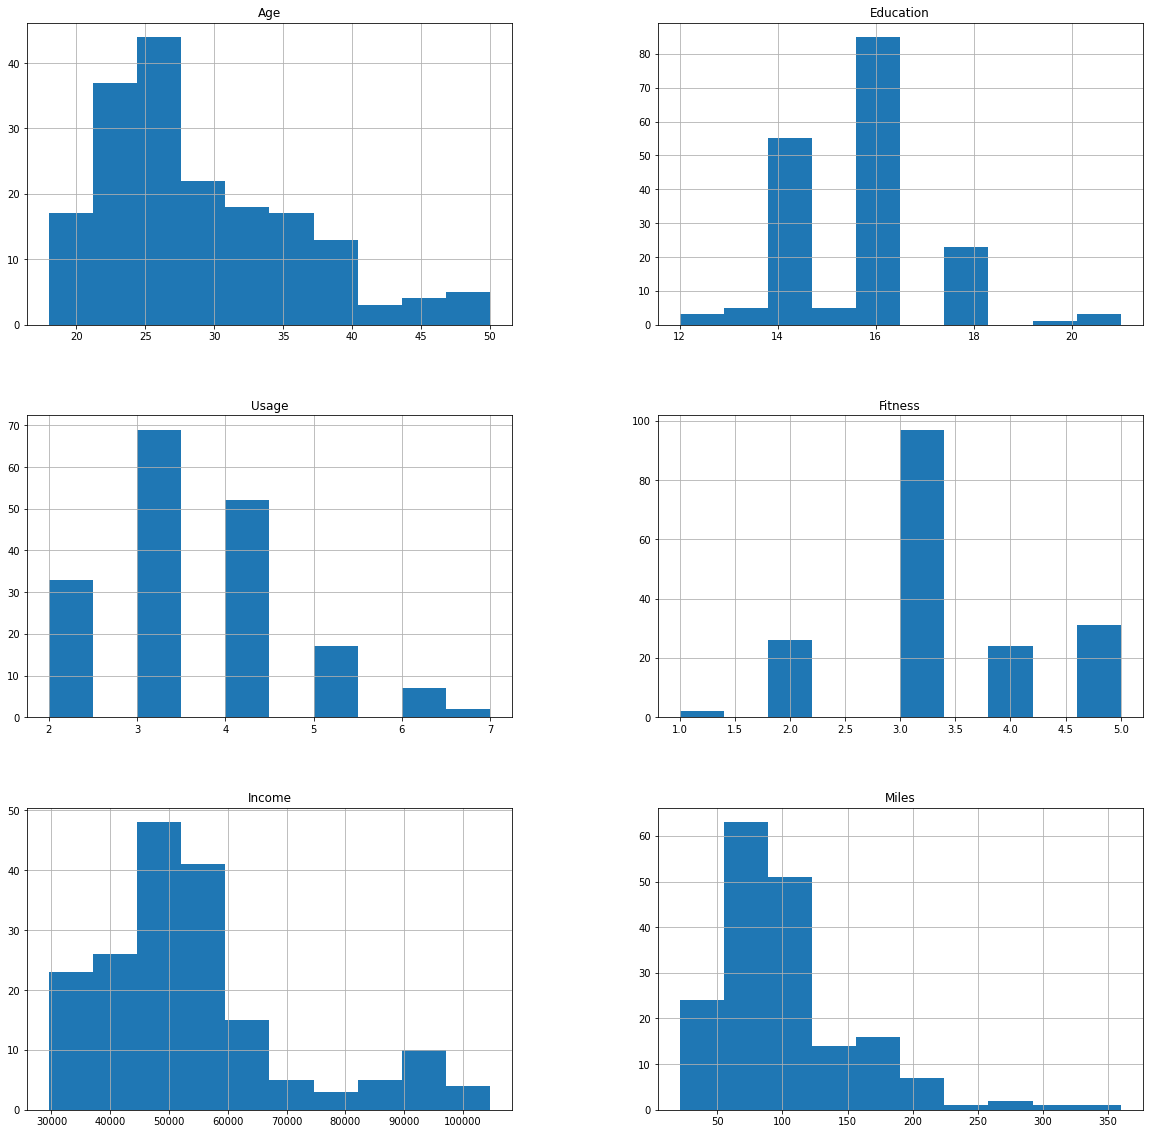

In [18]:
df.hist(figsize=(20,20))

In [19]:
df['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Gender'>

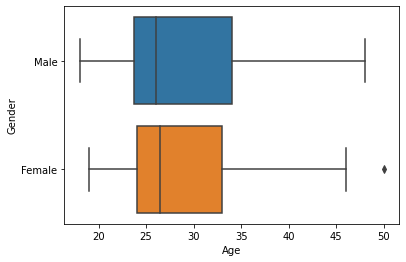

In [20]:
sns.boxplot(x=df['Age'],y=df['Gender'])

<AxesSubplot:xlabel='Gender', ylabel='Age'>

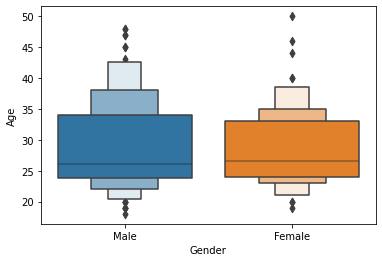

In [21]:
sns.boxenplot(x='Gender', y='Age', data=df)

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

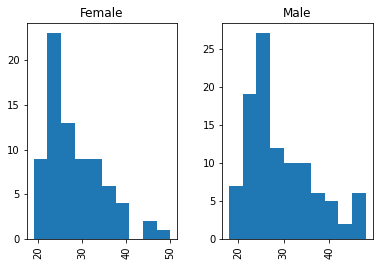

In [22]:
df.hist(by='Gender',column = 'Age')

In [23]:
pd.crosstab(df['Product'], df['Gender'] )

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


Text(0.5, 1.0, 'Pie chart of Product Sales')

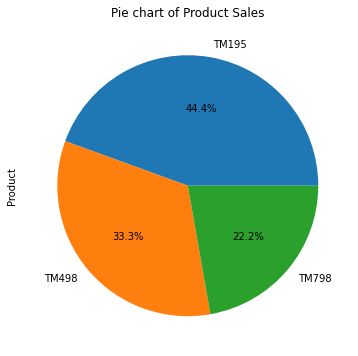

In [24]:
plt.figure(figsize=(8, 6))
df['Product'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Pie chart of Product Sales")

<AxesSubplot:xlabel='Product', ylabel='count'>

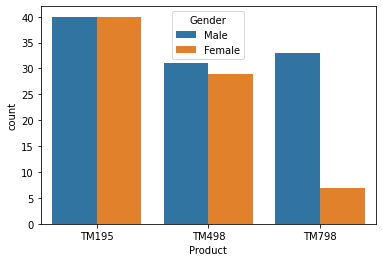

In [25]:
sns.countplot(x=df['Product'],hue=df['Gender'])

<AxesSubplot:xlabel='Miles', ylabel='Age'>

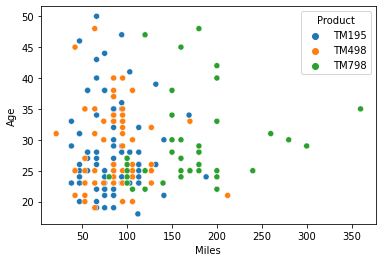

In [26]:
sns.scatterplot(x=df['Miles'],y=df['Age'],hue=df['Product'])

<AxesSubplot:xlabel='Income', ylabel='Age'>

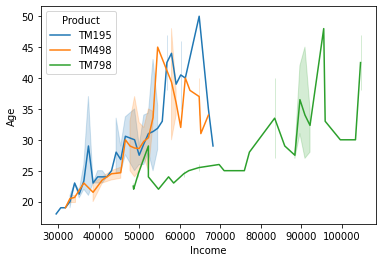

In [27]:
sns.lineplot(x=df['Income'],y=df['Age'],hue=df['Product'])

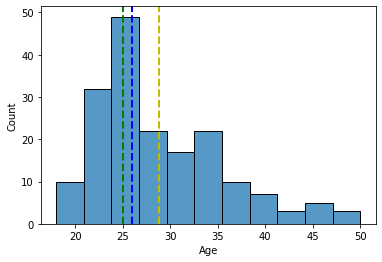

In [28]:
sns.histplot(df['Age'])
plt.axvline(df['Age'].mean(), color="y",linestyle='--',linewidth=2,label='Mean')
plt.axvline(df['Age'].median(), color="b",linestyle='--',linewidth=2,label='Median')
plt.axvline(df['Age'].mode()[0], color="g",linestyle='--',linewidth=2,label='Mode')

In [29]:
corr = df.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

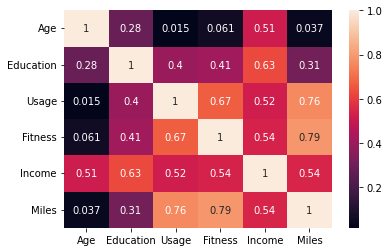

In [30]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True)